<a href="https://colab.research.google.com/github/bhadreshpsavani/Car-Price-Prediction-/blob/master/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# EDA

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Datasets/CarPricePrediction/data.csv")

In [20]:
df.head()

,car_company,model_ID,mileage,engine_power,registration_date,fuel,car_paint_color,car_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,sold_date,car_price
0,Edureka_motors,318 Gran Turismo,140245,105,01-10-2014,diesel,white,hatchback,False,True,False,False,True,True,True,True,01-03-2018,19200
1,Edureka_motors,218 Active Tourer,91512,100,01-06-2015,petrol,white,van,False,True,True,False,False,False,True,False,01-05-2018,14300
2,Edureka_motors,318,113744,100,01-06-2012,diesel,grey,sedan,True,True,False,False,False,False,True,False,01-06-2018,14300
3,Edureka_motors,320 Gran Turismo,195063,135,01-05-2014,diesel,black,hatchback,False,True,True,False,True,False,True,True,01-03-2018,16200
4,Edureka_motors,518,148943,100,01-11-2013,diesel,brown,estate,True,True,True,False,True,False,True,True,01-05-2018,17300


## Visulizing Car Price Distribution

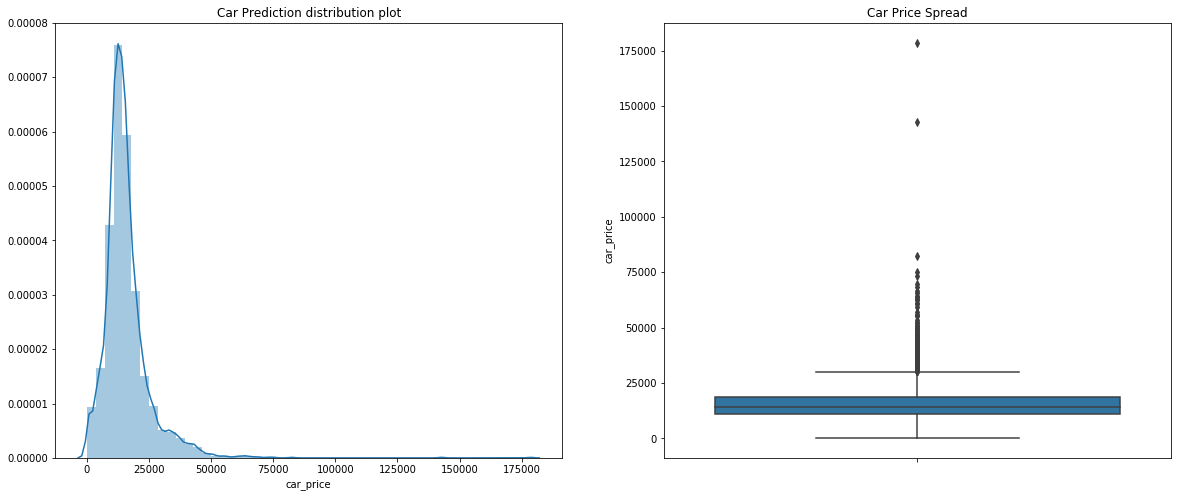

In [21]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.title("Car Prediction distribution plot")
sns.distplot(df["car_price"])

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df["car_price"])

## Visulizing Categorical Data

[Text(0, 0.5, 'frequency of car type'), Text(0.5, 0, 'car type')]

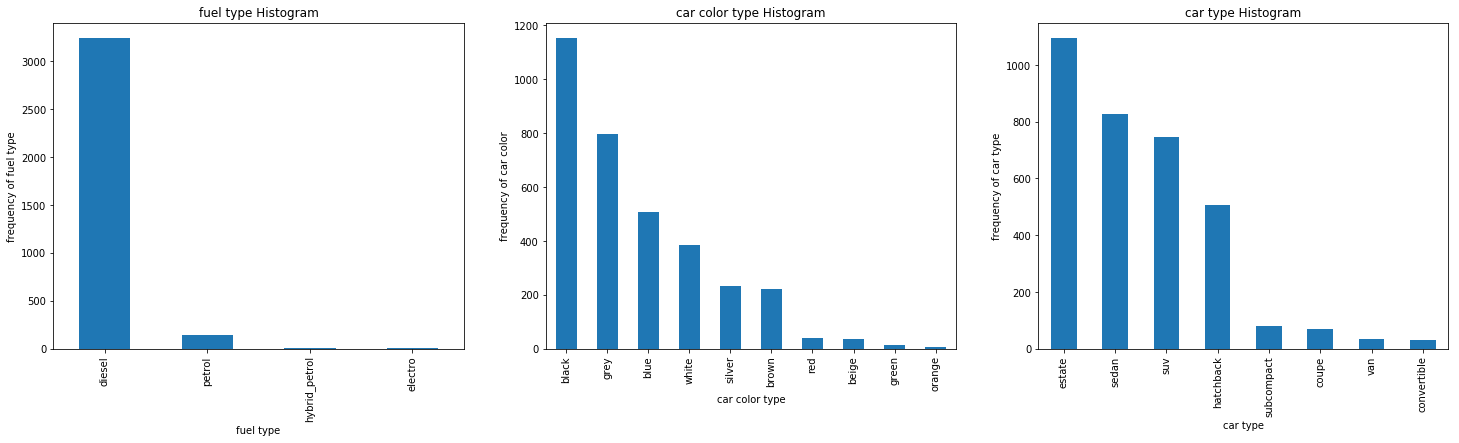

In [24]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plt1=df['fuel'].value_counts().plot('bar')
plt.title("fuel type Histogram")
plt1.set(xlabel='fuel type', ylabel="frequency of fuel type")

plt.subplot(1,3,2)
plt1=df['car_paint_color'].value_counts().plot('bar')
plt.title("car color type Histogram")
plt1.set(xlabel='car color type', ylabel="frequency of car color")

plt.subplot(1,3,3)
plt1=df['car_type'].value_counts().plot('bar')
plt.title("car type Histogram")
plt1.set(xlabel='car type', ylabel="frequency of car type")

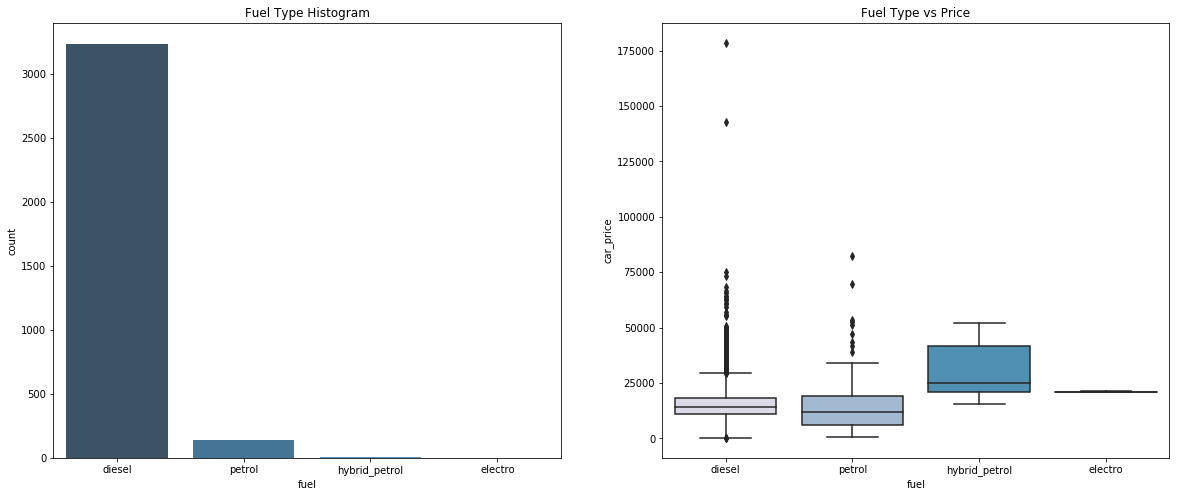

In [23]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Fuel Type Histogram')
sns.countplot(df['fuel'], palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Fuel Type vs Price')
sns.boxplot(x=df['fuel'], y=df['car_price'], palette=("PuBuGn"))

plt.show()

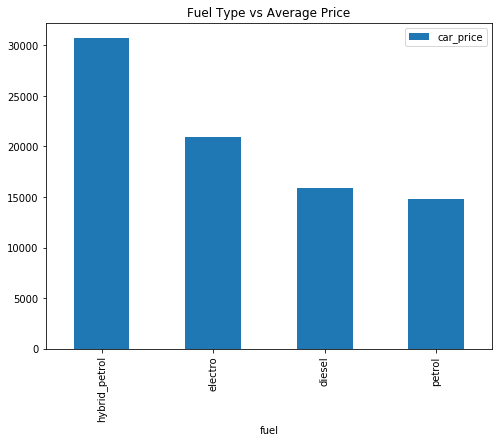

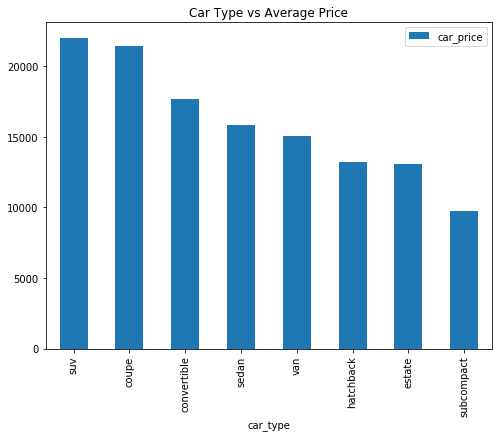

In [25]:
df1 = pd.DataFrame(df.groupby(['fuel'])['car_price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('Fuel Type vs Average Price')
plt.show()

df1 = pd.DataFrame(df.groupby(['car_type'])['car_price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('Car Type vs Average Price')
plt.show()

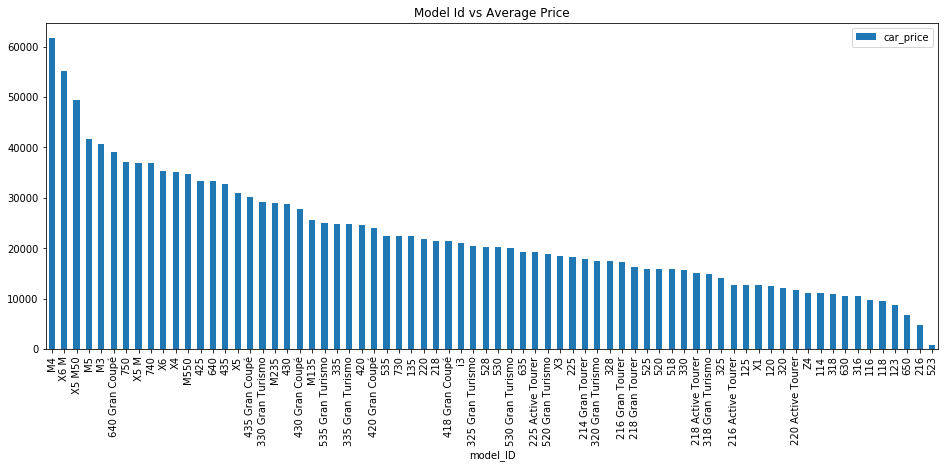

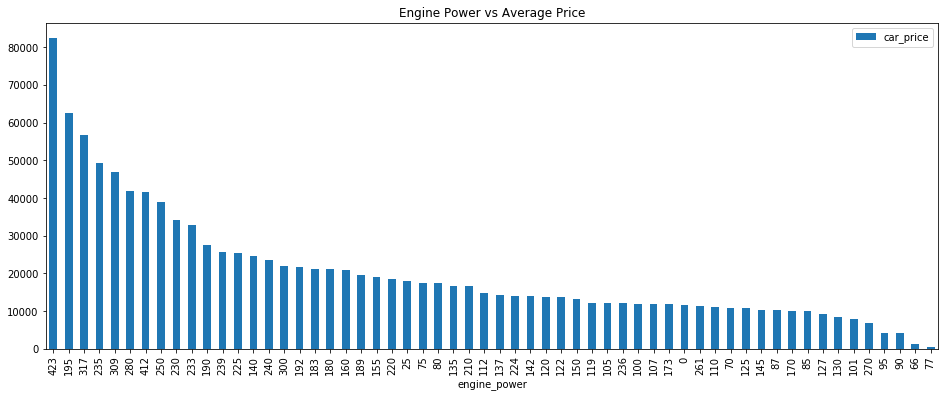

In [26]:
df3 = pd.DataFrame(df.groupby(['model_ID'])['car_price'].mean().sort_values(ascending = False))
df3.plot.bar(figsize=(16,6))
plt.title('Model Id vs Average Price')
plt.show()

df4 = pd.DataFrame(df.groupby(['engine_power'])['car_price'].mean().sort_values(ascending = False))
df4.plot.bar(figsize=(16,6))
plt.title('Engine Power vs Average Price')
plt.show()

## Visulizing  Numeric Data

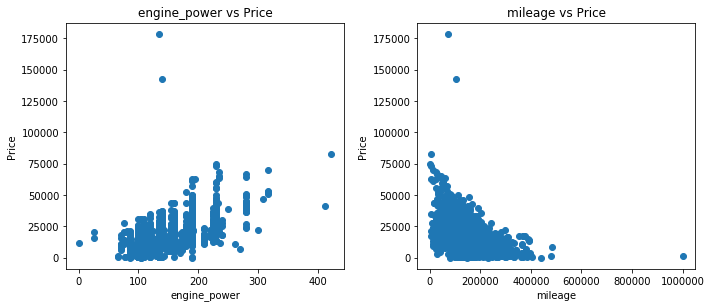

In [27]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['car_price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('engine_power', 1)
scatter('mileage', 2)
plt.tight_layout()

Size of database before removing Outliers : 3390
Size of database after removing Outliers : 3385


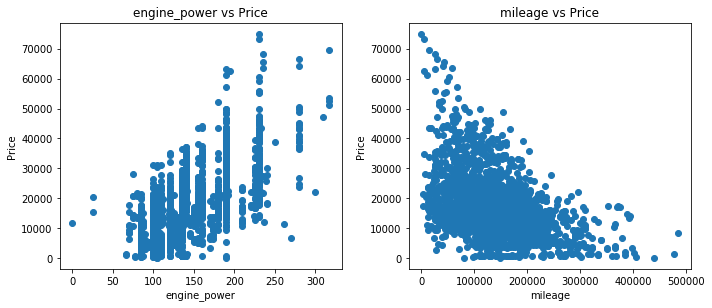

In [28]:
#Deleting outliers
print("Size of database before removing Outliers : "+ str(len(df)))
df = df.drop(df[(df['engine_power']>350) | (df['car_price']>100000)].index)
df = df.drop(df[(df['mileage']>600000) | (df['car_price']>100000)].index)
print("Size of database after removing Outliers : "+ str(len(df)))
plt.figure(figsize=(10,20))
scatter('engine_power', 1)
scatter('mileage', 2)
plt.tight_layout()

In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3385 entries, 0 to 3389
Data columns (total 18 columns):
car_company          3385 non-null object
model_ID             3385 non-null object
mileage              3385 non-null int64
engine_power         3385 non-null int64
registration_date    3385 non-null object
fuel                 3385 non-null object
car_paint_color      3385 non-null object
car_type             3385 non-null object
feature1             3385 non-null bool
feature2             3385 non-null bool
feature3             3385 non-null bool
feature4             3385 non-null bool
feature5             3385 non-null bool
feature6             3385 non-null bool
feature7             3385 non-null bool
feature8             3385 non-null bool
sold_date            3385 non-null object
car_price            3385 non-null int64
dtypes: bool(8), int64(3), object(7)
memory usage: 317.3+ KB
None


In [30]:
df.describe()

,mileage,engine_power,car_price
count,3385.000000,3385.000000,3385.000000
mean,141427.193796,128.753028,15790.723781
std,59606.909936,38.776888,8670.432705
min,-64.000000,0.000000,100.000000
25%,103331.000000,100.000000,10900.000000
50%,141717.000000,120.000000,14200.000000
75%,175310.000000,135.000000,18500.000000
max,484615.000000,317.000000,75000.000000


In [31]:
df.describe(include=['object', 'bool'])

,car_company,model_ID,registration_date,fuel,car_paint_color,car_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,sold_date
count,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385
unique,1,71,188,4,10,8,2,2,2,2,2,2,2,2,9
top,Edureka_motors,320,01-07-2013,diesel,black,estate,True,True,False,False,False,False,True,True,01-05-2018
freq,3385,530,120,3236,1152,1095,1866,2694,2718,2720,1836,2566,3155,1801,553


In [32]:
df.iloc[:,0].value_counts()

Edureka_motors    3385
Name: car_company, dtype: int64

In [33]:
for i in range(df.shape[1]):
    if df.iloc[:,i].dtype == 'object':
        print(df.iloc[:,i].value_counts())
    else:
        print(df.iloc[:,i].describe())

Edureka_motors    3385
Name: car_company, dtype: int64
320                  530
520                  449
318                  397
X3                   306
116                  254
X1                   188
316                  166
X5                   165
525                  123
530                   99
118                   98
318 Gran Turismo      74
320 Gran Turismo      55
518                   42
X6                    35
X4                    33
420                   33
535                   33
420 Gran Coupé        24
120                   21
330                   20
730                   20
640 Gran Coupé        15
520 Gran Turismo      14
X5 M                  13
325                   13
530 Gran Turismo      13
218 Active Tourer     12
740                   12
114                   11
                    ... 
135                    4
125                    4
216 Gran Tourer        4
435 Gran Coupé         3
435                    3
Z4                     3
216 Active Tourer   

In [0]:
from datetime import date
from keras.utils import to_categorical

def categorical_to_int(df):
  model_dict= {value:i+1 for i, value in enumerate(df['model_ID'].unique())}
  fuel_dict= {value:i+1 for i, value in enumerate(df['fuel'].unique())}
  color_dict= {value:i+1 for i, value in enumerate(df['car_paint_color'].unique())}
  car_type_dict= {value:i+1 for i, value in enumerate(df['car_type'].unique())}
  df=df.replace({'model_ID': model_dict})
  df=df.replace({'fuel': fuel_dict})
  df=df.replace({'car_paint_color': color_dict})
  df=df.replace({'car_type': car_type_dict})
  return df

def findDaysOfCarUse(reg_date_list, sold_date_list):
  """
  This function will return duration of use by getting date of registration and date of sold
  """
  car_use_days=list()
  for i in range(len(reg_date_list)):
    reg_date_str=reg_date_list[i].split('-')
    sold_date_str=sold_date_list[i].split('-')
    d1=date(int(reg_date_str[2]), int(reg_date_str[1]), int(reg_date_str[0]))
    d2=date(int(sold_date_str[2]), int(sold_date_str[1]), int(sold_date_str[0]))
    car_use_days.append((d2-d1).days)
  return car_use_days

def convert_bool_to_int(df):
  #lets replace numpy boolean type to integer in the feature columns
  df['feature1']=df['feature1'].values.astype(int)
  df['feature2']=df['feature2'].values.astype(int)
  df['feature3']=df['feature3'].values.astype(int)
  df['feature4']=df['feature4'].values.astype(int)
  df['feature5']=df['feature5'].values.astype(int)
  df['feature6']=df['feature6'].values.astype(int)
  df['feature7']=df['feature7'].values.astype(int)
  df['feature8']=df['feature8'].values.astype(int)
  return df

In [0]:
def preprocessing(df):
  #Car Company is same throughout this entire dataset so it will not going to help in car prediction so we will drop the column
  df=df.drop(['car_company'], axis=1)

  #convert categorical columns to inetegers
  df=categorical_to_int(df)

  #get duration of car use
  reg_date_list=df['registration_date'].values
  sold_date_list=df['sold_date'].values
  car_use_days=findDaysOfCarUse(reg_date_list, sold_date_list)

  #drop registration_date and sold_date data and add car_use_duration in days
  df=df.drop(['registration_date','sold_date'], axis=1)
  df.insert(2, 'car_use_duration', car_use_days)

  #lets replace numpy boolean type to integer in the feature columns
  df=convert_bool_to_int(df)

  df = pd.get_dummies(df)
  
  return df

In [36]:
proc_df=preprocessing(df)
proc_df.head()

,model_ID,mileage,car_use_duration,engine_power,fuel,car_paint_color,car_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,car_price
0,1,140245,1247,105,1,1,1,0,1,0,0,1,1,1,1,19200
1,2,91512,1065,100,2,1,2,0,1,1,0,0,0,1,0,14300
2,3,113744,2191,100,1,2,3,1,1,0,0,0,0,1,0,14300
3,4,195063,1400,135,1,3,1,0,1,1,0,1,0,1,1,16200
4,5,148943,1642,100,1,4,4,1,1,1,0,1,0,1,1,17300


In [37]:
for i in range(proc_df.shape[1]):
    if proc_df.iloc[:,i].dtype == 'object':
        print(proc_df.iloc[:,i].value_counts())
    else:
        print(proc_df.iloc[:,i].describe())

count    3385.000000
mean       11.685377
std         9.242464
min         1.000000
25%         6.000000
50%        10.000000
75%        14.000000
max        71.000000
Name: model_ID, dtype: float64
count      3385.000000
mean     141427.193796
std       59606.909936
min         -64.000000
25%      103331.000000
50%      141717.000000
75%      175310.000000
max      484615.000000
Name: mileage, dtype: float64
count     3385.000000
mean      1982.741507
std        924.134148
min        273.000000
25%       1489.000000
50%       1767.000000
75%       2130.000000
max      10258.000000
Name: car_use_duration, dtype: float64
count    3385.000000
mean      128.753028
std        38.776888
min         0.000000
25%       100.000000
50%       120.000000
75%       135.000000
max       317.000000
Name: engine_power, dtype: float64
count    3385.000000
mean        1.047563
std         0.232764
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
N

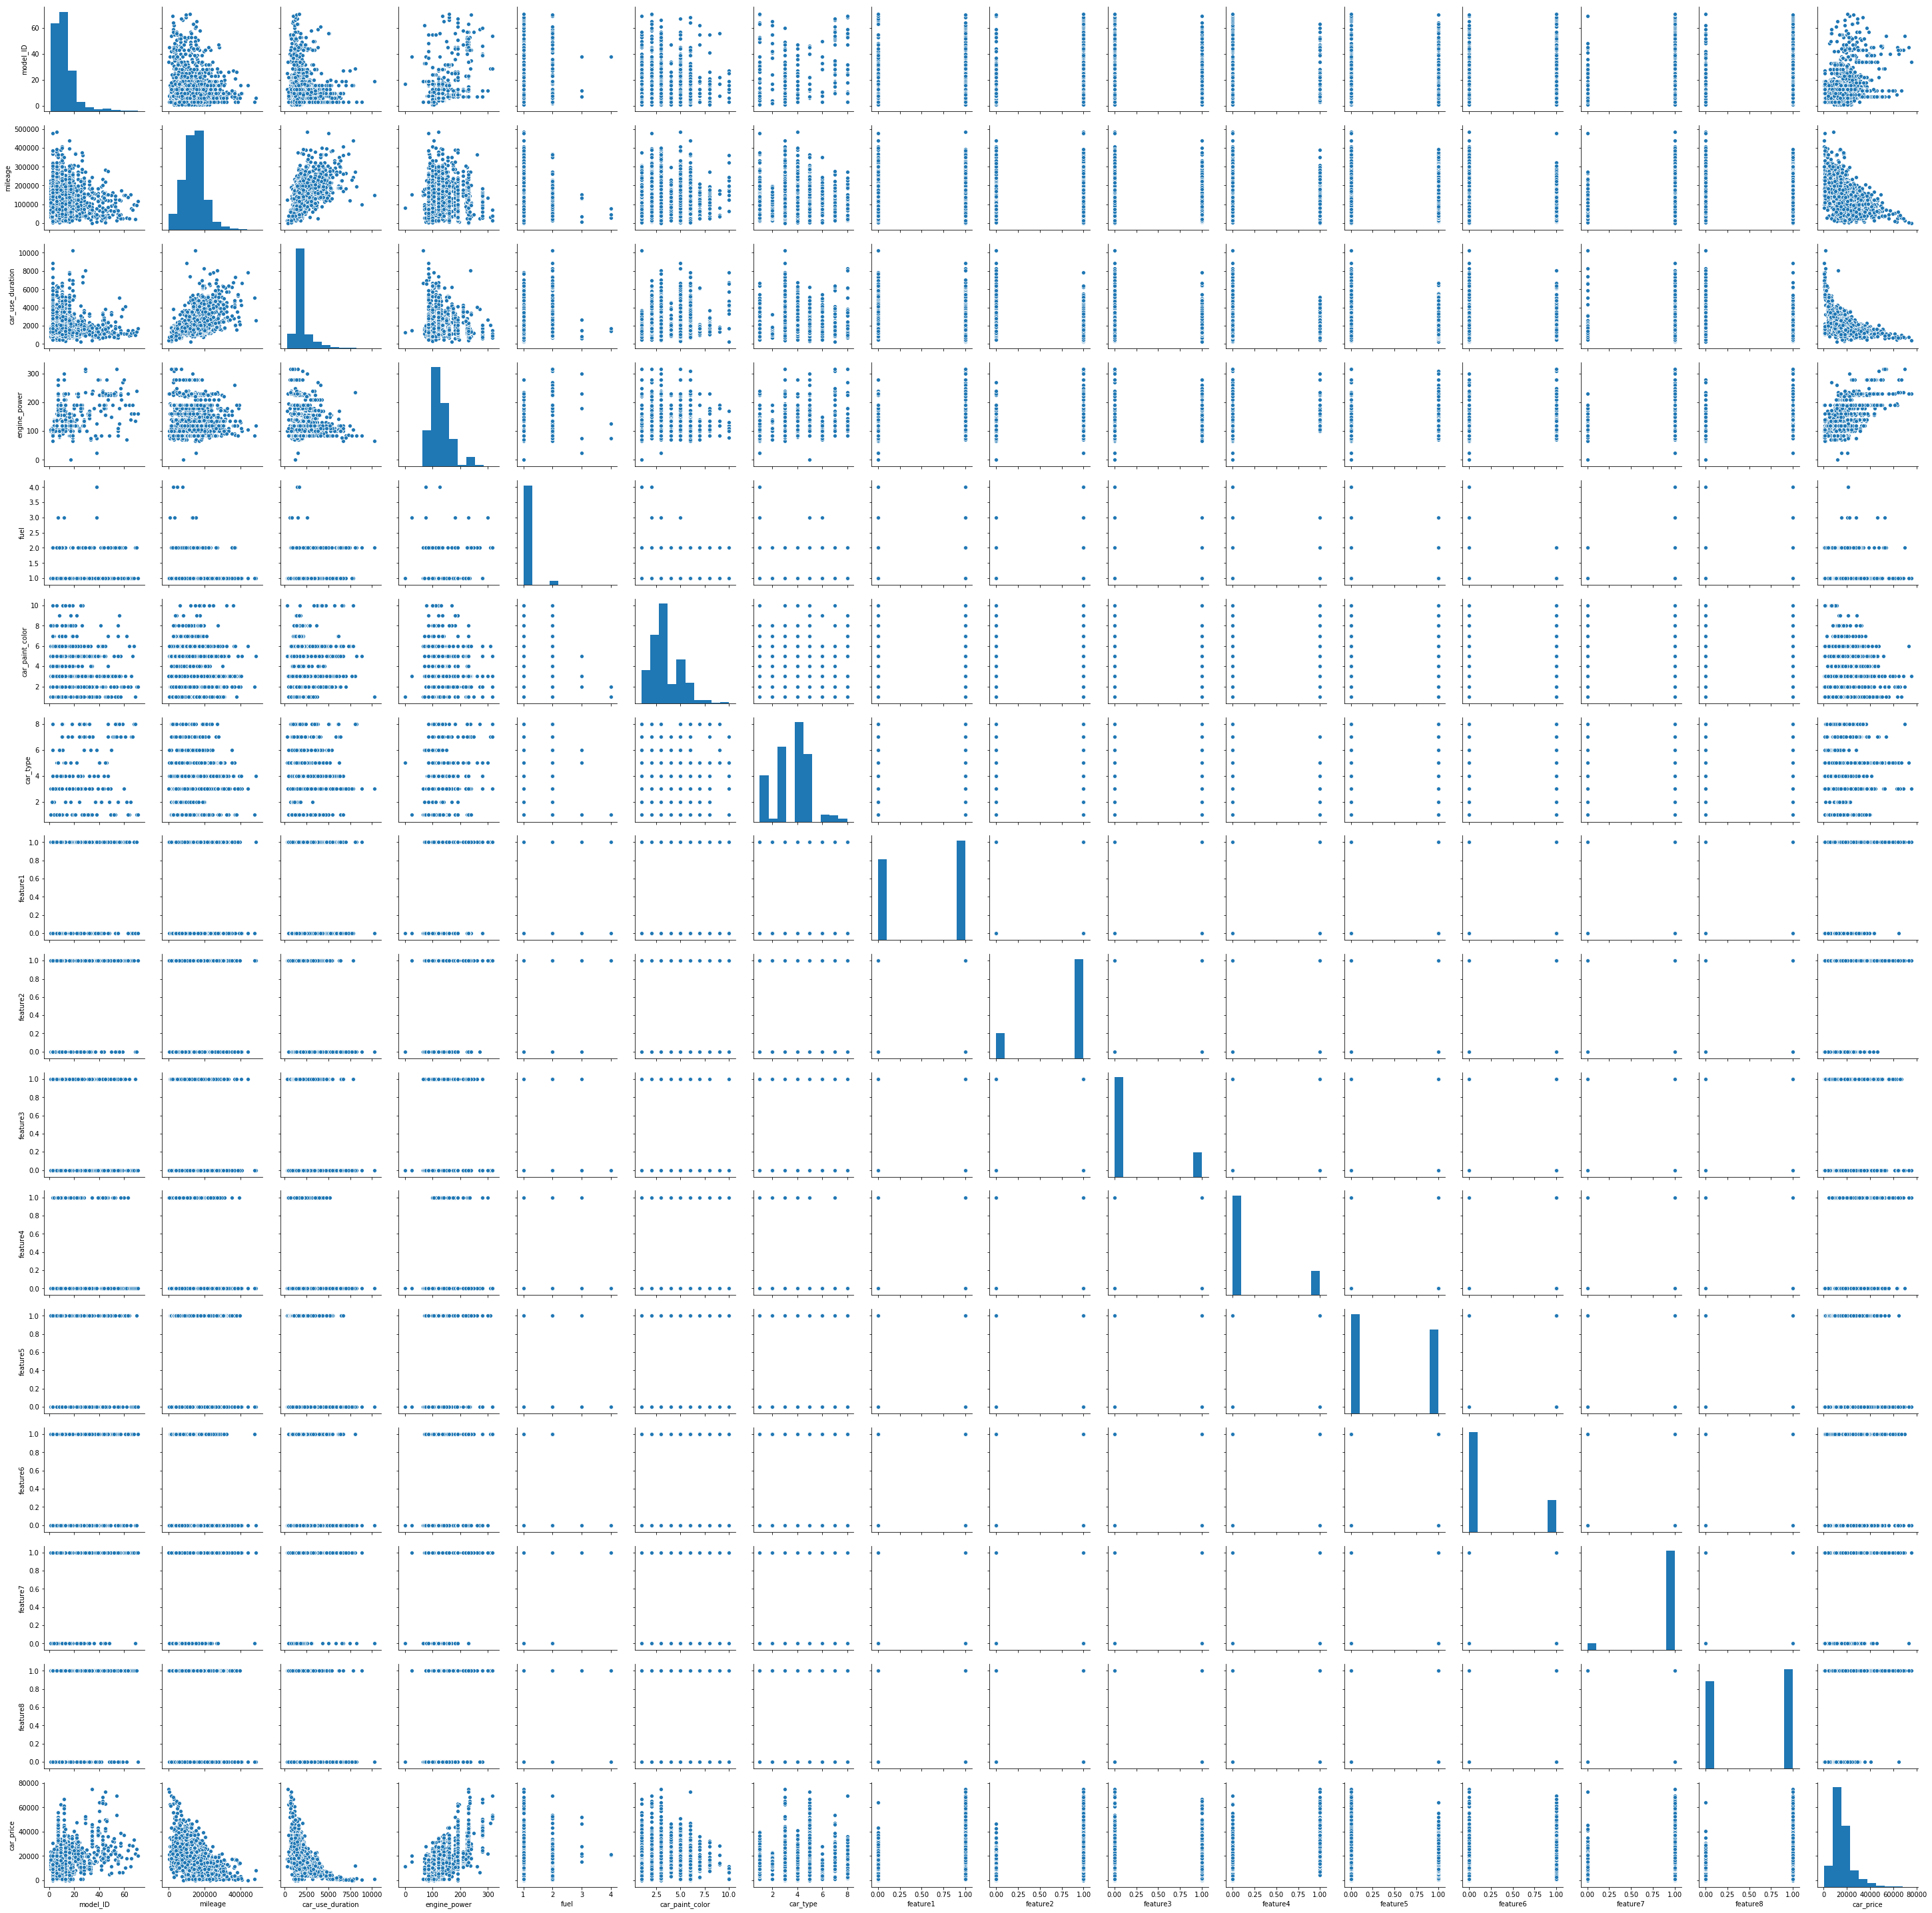

<Figure size 1440x1260 with 0 Axes>

In [40]:
sns.pairplot(proc_df)
plt.figure(figsize = (20, 17.5))
plt.show()

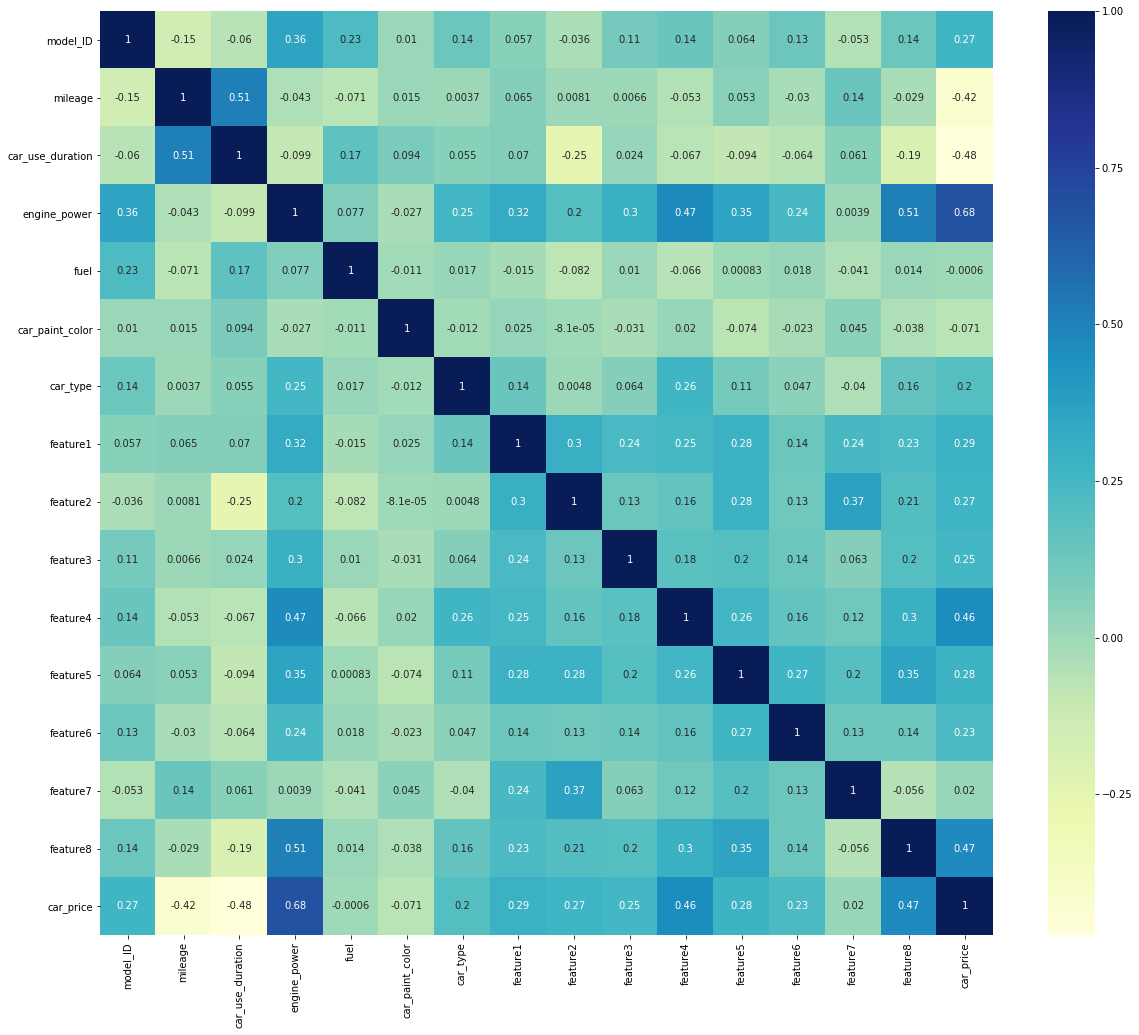

In [41]:
#Correlation using heatmap
plt.figure(figsize = (20, 17))
sns.heatmap(proc_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [0]:
data_y=proc_df['car_price'].values
data_x=proc_df.drop(['car_price'], axis=1).values

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data_x)
x_train_scaled=scaler.transform(data_x)

In [44]:
# print dataset properties before and after scaling
print("transformed shape: {}".format(x_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(data_x.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(data_x.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
 x_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
 x_train_scaled.max(axis=0)))


transformed shape: (3385, 15)
per-feature minimum before scaling:
 [  1 -64 273   0   1   1   1   0   0   0   0   0   0   0   0]
per-feature maximum before scaling:
 [    71 484615  10258    317      4     10      8      1      1      1
      1      1      1      1      1]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Build Regression model 

## Linear Regressor Using scikit-learn

In [45]:
from sklearn.model_selection import train_test_split

X_train_in, X_test, y_train_in, y_test = train_test_split(data_x, data_y, test_size=0.2, shuffle=True)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_in, y_train_in, test_size=0.2, shuffle=True)
print(len(y_train), len(y_valid), len(y_test))

2166 542 677


In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_valid, y_valid)))

Training set score: 0.71
Test set score: 0.77


In [47]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_valid, y_valid)))


Training set score: 0.71
Test set score: 0.77


In [48]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_valid, y_valid)))

Training set score: 0.71
Test set score: 0.77


In [49]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_valid, y_valid)))

Training set score: 0.71
Test set score: 0.77


In [50]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_valid, y_valid)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.71
Test set score: 0.77
Number of features used: 15


In [51]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_valid, y_valid)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.71
Test set score: 0.77
Number of features used: 15


In [52]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_valid, y_valid)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.71
Test set score: 0.77
Number of features used: 15


In [53]:
y_test[:10]

array([16500, 17900, 12600, 11900, 15500, 26800, 11900, 13300, 10100,
       12900])

In [54]:
lasso00001.predict(X_test)[:10]

array([24592.31459738, 25554.9212596 , 13857.78179039, 11985.04909873,
       19802.70029076, 30427.21835904, 10720.47541981,  9507.62975438,
        8484.16177836, 16542.54573903])

## Deep Learning model using Pytorch

In [0]:
import torch
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn.functional as F

In [0]:
import torch 
from torch.autograd import Variable 

class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(15, 144)
        self.fc2 = nn.Linear(144, 72)
        self.fc3 = nn.Linear(72, 18)
        self.fc4 = nn.Linear(18, 1)

        #self.dropout = nn.Dropout(p=0.1)

    def forward(self, x):

        #x = self.dropout(F.relu(self.fc1(x)))
        #x = self.dropout(F.relu(self.fc2(x)))
        #x = self.dropout(F.relu(self.fc3(x)))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))

        return x

In [0]:
train_batch = np.array_split(X_train, 50)
label_batch = np.array_split(y_train, 50)

for i in range(len(train_batch)):
    train_batch[i] = torch.from_numpy(train_batch[i]).float()
for i in range(len(label_batch)):
    label_batch[i] = torch.from_numpy(label_batch[i]).float().view(-1, 1)

X_val = torch.from_numpy(X_valid).float()
y_val = torch.from_numpy(y_valid).float().view(-1, 1)

In [58]:
model = Regressor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 200

train_losses, test_losses = [], []
for e in range(epochs):
    model.train()
    train_loss = 0
    for i in range(len(train_batch)):
        optimizer.zero_grad()
        output = model(train_batch[i])
        loss = torch.sqrt(criterion(torch.log(output), torch.log(label_batch[i])))
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        with torch.no_grad():
            model.eval()
            predictions = model(X_val)
            test_loss += torch.sqrt(criterion(torch.log(predictions), torch.log(y_val)))
                
        train_losses.append(train_loss/len(train_batch))
        test_losses.append(test_loss)

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_loss/len(train_batch)),
              "Test Loss: {:.3f}.. ".format(test_loss))

Epoch: 1/200..  Training Loss: 1.045..  Test Loss: 0.941.. 
Epoch: 2/200..  Training Loss: 0.944..  Test Loss: 0.940.. 
Epoch: 3/200..  Training Loss: 0.943..  Test Loss: 0.938.. 
Epoch: 4/200..  Training Loss: 0.942..  Test Loss: 0.936.. 
Epoch: 5/200..  Training Loss: 0.939..  Test Loss: 0.934.. 
Epoch: 6/200..  Training Loss: 0.936..  Test Loss: 0.937.. 
Epoch: 7/200..  Training Loss: 0.932..  Test Loss: 0.936.. 
Epoch: 8/200..  Training Loss: 0.926..  Test Loss: 0.927.. 
Epoch: 9/200..  Training Loss: 0.917..  Test Loss: 0.927.. 
Epoch: 10/200..  Training Loss: 0.904..  Test Loss: 0.905.. 
Epoch: 11/200..  Training Loss: 0.885..  Test Loss: 0.900.. 
Epoch: 12/200..  Training Loss: 0.867..  Test Loss: 0.889.. 
Epoch: 13/200..  Training Loss: 0.856..  Test Loss: 0.879.. 
Epoch: 14/200..  Training Loss: 0.848..  Test Loss: 0.870.. 
Epoch: 15/200..  Training Loss: 0.840..  Test Loss: 0.857.. 
Epoch: 16/200..  Training Loss: 0.835..  Test Loss: 0.853.. 
Epoch: 17/200..  Training Loss: 0

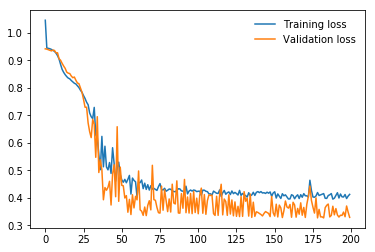

In [59]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [60]:
X_test = torch.from_numpy(X_test).float()

with torch.no_grad():
    model.eval()
    output = model.forward(X_test)

output.shape

torch.Size([677, 1])

In [67]:
print("Predicted values : "+ str(output[:10]))

Predicted values : tensor([[24761.8750],
        [23238.1328],
        [13404.6260],
        [12582.5752],
        [15496.3174],
        [31263.0059],
        [ 9781.6201],
        [ 9642.1025],
        [ 8084.4536],
        [15366.4463]])


In [64]:
print("True values : "+ str(y_test[:10])

True values : [16500 17900 12600 11900 15500 26800 11900 13300 10100 12900]
